## 1. Download Data

In [1]:
import pandas as pd
from pandas.tseries.offsets import YearEnd

In [2]:
def load_deepsearch_data(filepath, column):
    df = pd.read_excel(filepath)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df.columns = [column]
    
    return df
    

### 1.1 load exchange data

In [3]:
# deepsearch data loading
df_xr = load_deepsearch_data('./proj_data/krw_cad_xr.xlsx', 'KRW/CAD')


In [4]:
df_monthly = df_xr.resample('M').last()

In [5]:
# set data after 2008 financial crisis
df_monthly = df_monthly.loc['2009-01-01':]

In [6]:
df_monthly.head()

,KRW/CAD
date,
2009-01-31,1116.50
2009-02-28,1209.49
2009-03-31,1091.38
2009-04-30,1119.83
2009-05-31,1141.41


### 1.2 load other whole data

In [7]:
def load_world_bank_data(filepath, column, nation):
    df = pd.read_excel(filepath, sheet_name = 'Data', skiprows = 3)
    df = df.set_index('Country Code')
    df = df.loc[nation].to_frame()
    
    df = df.iloc[3:]
    df.dropna(inplace=True)
    df[nation] = df[nation].astype(float)
    df['date'] = pd.to_datetime(df.index)+YearEnd(0)
    df.set_index('date', inplace=True)
    df.columns = [column]
    return df
      
    

### 1.3 load data for REAL XR

In [8]:
df_real_xr = load_world_bank_data('./proj_data/world_real_xr.xls', 'Real XR', 'KOR')

In [9]:
df_real_can_xr = load_world_bank_data('./proj_data/world_real_xr.xls', 'Real CAN XR', 'CAN')

In [10]:
df_ppp_xr = load_world_bank_data('./proj_data/world_ppp_xr.xls', 'PPP XR', 'KOR')

In [11]:
df_ppp_can_xr = load_world_bank_data('./proj_data/world_ppp_xr.xls', 'CAN PPP XR', 'CAN')

In [12]:
df_ppp_xr.tail()

,PPP XR
date,
2016-12-31,858.809687
2017-12-31,872.624771
2018-12-31,854.871397
2019-12-31,864.630567
2020-12-31,824.604924


### 1.4 load data for Inflation rate

In [13]:
df_cpi_korea = load_deepsearch_data('./proj_data/cpi_korea.xlsx', 'cpi_korea')

In [14]:
df_cpi_canada = load_deepsearch_data('./proj_data/cpi_canada.xlsx', 'cpi_canada')

In [15]:
df_cpi_merged = df_cpi_korea.join(df_cpi_canada)

In [16]:
df_cpi_merged.head()

,cpi_korea,cpi_canada
date,,
1951-08-31,0.15,12.02
1951-09-30,0.15,12.11
1951-10-31,0.13,12.19
1951-11-30,0.13,12.28
1951-12-31,0.14,12.28


### 1.5 load data for Interest rate

In [17]:
df_korea = load_deepsearch_data('proj_data/int_rate_korea.xlsx', 'int_rate_korea')

In [18]:
df_korea = df_korea.resample('M').last()

In [19]:
df_korea.head(3)

,int_rate_korea
date,
2000-02-29,8.25
2000-03-31,8.32
2000-04-30,8.32


In [20]:
df_canada = pd.read_excel('proj_data/int_rate_canada.xls',skiprows=14)

In [21]:
df_canada.dropna(axis=1, inplace=True)

In [22]:
df_canada.sort_values(by='Date', ascending=True, inplace=True)

In [23]:
df_canada['Date'] = pd.to_datetime(df_canada['Date'])
df_canada = df_canada.set_index('Date')
df_canada = df_canada.loc['1998-12-31':]
df_canada.columns = ['int_rate_canada']

In [24]:
df_canada.head()

,int_rate_canada
Date,
1998-12-31,4.895
1999-01-31,4.885
1999-02-28,5.365
1999-03-31,5.060
1999-04-30,5.171


### ppp dataset merge

In [25]:
df_ppp_merge = df_ppp_xr.join(df_ppp_can_xr)

In [26]:
df_ppp_merge.head()

,PPP XR,CAN PPP XR
date,,
1990-12-31,559.920181,1.241556
1991-12-31,591.112647,1.237590
1992-12-31,622.893976,1.227694
1993-12-31,646.528116,1.214689
1994-12-31,684.657732,1.206599


### real xr dataset merge

In [27]:
# real xr dataset merge
df_real_xr_merged = df_real_xr.join(df_real_can_xr)

In [28]:
df_real_xr_merged.head()

,Real XR,Real CAN XR
date,,
1990-12-31,0.791116,1.064069
1991-12-31,0.806044,1.080204
1992-12-31,0.797917,1.015714
1993-12-31,0.805472,0.941546
1994-12-31,0.852147,0.883567


## 2. Data Preprocessing- REAL XR
>input dataframe : df_ppp_merge , df_real_xr_merged  
>output dataframe : df_merged

### 2-1 ppp calculate

$$
    \text{ppp calculate} = \frac{\frac{{P(KRW)}}{P(USD)}} {\frac{{P(CAN)}}{P(USD)}} = \frac{{P(KRW)}}{P(CAN)}
$$

In [29]:
df_ppp_merge['CALC_PPP_XR'] = df_ppp_merge['PPP XR']/ df_ppp_merge['CAN PPP XR']

In [30]:
df_real_xr_merged['CALC_REAL_XR'] = df_real_xr_merged['Real XR']/df_real_xr_merged['Real CAN XR']

In [31]:
df_real_xr_merged.tail()

,Real XR,Real CAN XR,CALC_REAL_XR
date,,,
2016-12-31,0.740077,0.910555,0.812776
2017-12-31,0.771944,0.934025,0.826471
2018-12-31,0.776803,0.931108,0.834278
2019-12-31,0.741944,0.939745,0.789517
2020-12-31,0.698660,0.928844,0.752182


In [32]:
df_merged= df_monthly.join(df_ppp_merge['CALC_PPP_XR'])

In [33]:
df_merged['CALC_PPP_XR'] = df_merged['CALC_PPP_XR'].fillna(method='ffill')

In [34]:
df_merged.head()

,KRW/CAD,CALC_PPP_XR
date,,
2009-01-31,1116.50,NaN
2009-02-28,1209.49,NaN
2009-03-31,1091.38,NaN
2009-04-30,1119.83,NaN
2009-05-31,1141.41,NaN


In [35]:
df_merged= df_merged.join(df_real_xr_merged['CALC_REAL_XR']) 

In [36]:
df_merged['CALC_REAL_XR'] = df_merged['CALC_REAL_XR'].fillna(method='ffill')

In [37]:
df_merged.head()

,KRW/CAD,CALC_PPP_XR,CALC_REAL_XR
date,,,
2009-01-31,1116.50,NaN,NaN
2009-02-28,1209.49,NaN,NaN
2009-03-31,1091.38,NaN,NaN
2009-04-30,1119.83,NaN,NaN
2009-05-31,1141.41,NaN,NaN


### 2-2 Calculate New Real Xr

$$
    \text{Real XR} = \frac{S^{PPP}}{S}
$$

In [38]:
## New Real XR calculate
### ppp/market exchange rate
df_merged['New Real XR'] = \
    df_merged['CALC_PPP_XR']/df_merged['KRW/CAD']


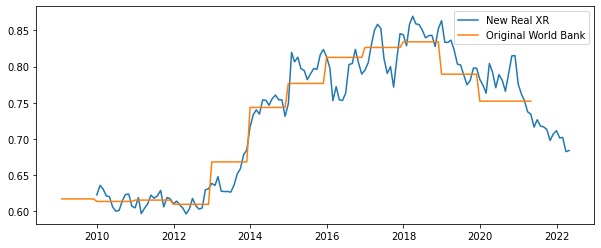

In [39]:
# let's draw a gragh with New Real XR and Original World Bank data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)

plt.plot(df_merged['New Real XR'], label = 'New Real XR')
plt.plot(df_merged['CALC_REAL_XR'].shift(-12), label = 'Original World Bank')
plt.legend()
plt.show()

### 2-3 Compute annual returns in the currency market

In [40]:
df_merged['ann_ret'] = \
    df_merged['KRW/CAD'].pct_change(periods=12)*100

In [41]:
df_merged['F12.ann_ret'] = \
    df_merged['ann_ret'].shift(-12)

In [42]:
df_merged.head(15)

,KRW/CAD,CALC_PPP_XR,CALC_REAL_XR,New Real XR,ann_ret,F12.ann_ret
date,,,,,,
2009-01-31,1116.50,NaN,NaN,NaN,NaN,-2.899239
2009-02-28,1209.49,NaN,NaN,NaN,NaN,-9.679286
2009-03-31,1091.38,NaN,NaN,NaN,NaN,1.670362
2009-04-30,1119.83,NaN,NaN,NaN,NaN,-0.763509
2009-05-31,1141.41,NaN,NaN,NaN,NaN,-0.311895
2009-06-30,1110.76,NaN,NaN,NaN,NaN,3.408477
2009-07-31,1144.11,NaN,NaN,NaN,NaN,0.237739
2009-08-31,1137.52,NaN,NaN,NaN,NaN,-1.391624
2009-09-30,1096.18,NaN,NaN,NaN,NaN,0.910434


## 3. Data Preprocessing- Inflation Rate
>input dataframe : df_cpi_merged  
>output dataframe : df_merged

In [43]:
df_cpi_merged['infl_korea'] = df_cpi_merged['cpi_korea'].pct_change(periods=12) *100

In [44]:
df_cpi_merged['infl_canada'] = df_cpi_merged['cpi_canada'].pct_change(periods=12) *100

In [45]:
df_cpi_merged['infl_diff'] = df_cpi_merged['infl_korea'] - df_cpi_merged['infl_canada']

In [46]:
df_cpi_merged.head(15)

,cpi_korea,cpi_canada,infl_korea,infl_canada,infl_diff
date,,,,,
1951-08-31,0.15,12.02,NaN,NaN,NaN
1951-09-30,0.15,12.11,NaN,NaN,NaN
1951-10-31,0.13,12.19,NaN,NaN,NaN
1951-11-30,0.13,12.28,NaN,NaN,NaN
1951-12-31,0.14,12.28,NaN,NaN,NaN
1952-01-31,0.16,12.36,NaN,NaN,NaN
1952-02-29,0.19,12.28,NaN,NaN,NaN
1952-03-31,0.23,12.19,NaN,NaN,NaN
1952-04-30,0.24,12.19,NaN,NaN,NaN


In [47]:
df_merged = df_merged.join(df_cpi_merged)

In [48]:
df_merged.head(15)

,KRW/CAD,CALC_PPP_XR,CALC_REAL_XR,New Real XR,ann_ret,F12.ann_ret,cpi_korea,cpi_canada,infl_korea,infl_canada,infl_diff
date,,,,,,,,,,,
2009-01-31,1116.50,NaN,NaN,NaN,NaN,-2.899239,95.46,97.02,3.749592,1.073028,2.676564
2009-02-28,1209.49,NaN,NaN,NaN,NaN,-9.679286,96.15,97.71,4.103508,1.422047,2.681461
2009-03-31,1091.38,NaN,NaN,NaN,NaN,1.670362,96.84,97.88,3.883287,1.241208,2.642079
2009-04-30,1119.83,NaN,NaN,NaN,NaN,-0.763509,97.09,97.80,3.573715,0.359159,3.214556
2009-05-31,1141.41,NaN,NaN,NaN,NaN,-0.311895,97.09,98.48,2.729870,0.081301,2.648569
2009-06-30,1110.76,NaN,NaN,NaN,NaN,3.408477,97.01,98.83,1.997687,-0.252321,2.250008
2009-07-31,1144.11,NaN,NaN,NaN,NaN,0.237739,97.35,98.48,1.617954,-0.955446,2.573400
2009-08-31,1137.52,NaN,NaN,NaN,NaN,-1.391624,97.70,98.48,2.164593,-0.785815,2.950408
2009-09-30,1096.18,NaN,NaN,NaN,NaN,0.910434,97.78,98.48,2.152110,-0.865714,3.017824


## 3. Data Preprocessing- Interset rate
>input dataframe : df_korea, df_canada  
>output dataframe : df_merged

In [49]:
df_interest_merged = pd.concat([df_korea,df_canada], axis=1)

In [50]:
df_interest_merged['int_rate_diff'] = df_interest_merged['int_rate_korea'] - df_interest_merged['int_rate_canada']

In [51]:
# df_merged

df_merged = df_merged.join(df_interest_merged)

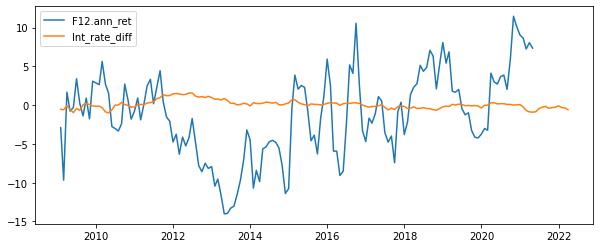

In [52]:
plt.plot(df_merged['F12.ann_ret'], label='F12.ann_ret')
plt.plot(df_merged['int_rate_diff'], label='Int_rate_diff')
plt.legend()
plt.show()

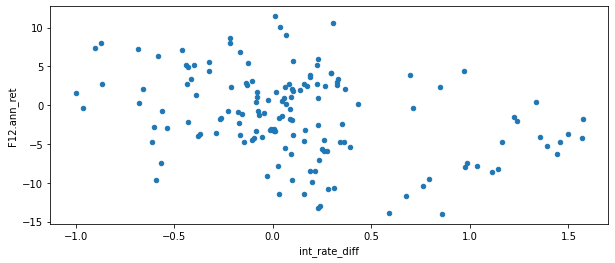

In [53]:
df_merged.plot(kind='scatter', x='int_rate_diff', y='F12.ann_ret')
plt.show()

### Use OLS!!!

In [54]:
import statsmodels.api as sm

In [55]:
X_cols = ['New Real XR', 'infl_diff', 'int_rate_diff']

In [56]:
df = df_merged[['F12.ann_ret', *X_cols]]
df = df.dropna()

In [57]:
X_data = df[X_cols].copy()
X = sm.add_constant(X_data)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
Y = df['F12.ann_ret']

In [59]:
model = sm.OLS(Y,X)

In [60]:
results = model.fit()

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     13.45
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.02e-07
Time:                        22:26:27   Log-Likelihood:                -412.81
No. Observations:                 137   AIC:                             833.6
Df Residuals:                     133   BIC:                             845.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -23.2567      5.388     -4.316      0.000     -33.914     -12.599
New Real XR      30.3603      7.236      4.196      0.000      16.048      44.673
infl_diff         1.7035      0.643      2.649      0.009       0.431       2.976
int_rate_diff    -2.1593      0.927     -2.328      0.021      -3.994      -0.325
==============================================================================
Omnibus:                        8.414   Durbin-Watson:                   0.333
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                3.708
Skew:                          -0.086   Prob(JB):                        0.157
Kurtosis:                       2.213   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Forecast XR

$$
y = \alpha + \beta x
$$

$$
\text{ret}_{t, t+12} = \alpha + \beta \, \text{Real XR}_t +\epsilon
$$

In [ ]:
results.params

In [ ]:
results.params

In [ ]:
last_obs = df_merged.iloc[-1]

In [ ]:
last_xr = last_obs['KRW/CAD']
last_year_xr = last_obs['New Real XR']

In [ ]:
last_xr

In [ ]:
last_year_xr

### method 1: simple , straightfoward, stupid

In [ ]:
alpha = results.params['const']
beta = results.params['New Real XR']

In [ ]:
alpha+beta*last_year_xr

### method 2: numpy 

In [ ]:
import numpy as np

In [ ]:
exog = [1, last_year_xr]

In [ ]:
np.dot(results.params, exog)

### method 3: predict

In [ ]:
results.predict(exog = exog)

In [ ]:
help(results.predict)

### confidence interval of our predictions

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
wls_prediction_std(results, exog = exog, alpha=0.05)

# alpha 0.05 >> 95% ...,,,,,,,,...

# predicted stdev, interval - lower, interval - upper 

In [ ]:
type(exog)

In [ ]:
for alpha in [.05, .25, .50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha=alpha)
    
    print('Confidence interval at alpha {:.2f} : {:.2f} % ~ {:.2f}%'.format( alpha, iv_l[0], iv_u[0]))

In [ ]:
pred_ret = results.predict(exog = exog )

In [ ]:
last_xr * (1+pred_ret[0]/100)

In [ ]:
last_xr

In [ ]:
for alpha in [.05, .25, .50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha=alpha)
    
    print('Confidence interval at alpha {:.2f} : {:.0f}  ~ {:.0f}'.format( alpha, last_xr*(1+iv_l[0]/100), last_xr*(1+iv_u[0]/100)))